El siguiente desafío busca introducir el problema fundamental de la Ciencia de Datos que es el
overfitting desde un ángulo distinto, presentando los fenómenos del efecto del tamaño de la
muestra, el conocido problema de las múltiples comparaciones y “la maldición del ganador”.

# Definición del problema

## 0) Caso fallido: "una jugadora se quiere pasar de lista"

Una es super talentosa se llama Diana Taurasi, nosotros sabemos que tiene un “índice de enceste”
del 0.85, es decir cada vez que hace un tiro libre su probabilidad de encestar es del 85%. Si hace
100 tiros libres, en promedio encesta 85 veces, a veces puede ser más, a veces menos, pero en
promedio encesta 85 de 100.

La otra es un auténtico desastre, a quien llamaremos Miss X, y su índice de enceste es de 0.10.
Esto quiere decir que si hace 100 tiros libres, en promedio encesta 10.
La cazatalentos NO tiene forma de conocer los valores de 0.85 y 0.10, solo puede hacerlas tirar y
contar aciertos.

La cazatalentos llega al gimnasio, y solo se encuentra Diana, con lo cual le indica que comience a
tirar. Al tiro 10, Diana lleva 8 encestes y dos no-enceste.


En ese momento, llega con un andar cansino Miss X y las interrumpe : ¿cuánto va Diana ? La
cazatalentos le responde 8 de 10. Miss X solicita permiso para tirar, y acierta ese tiro.
Ahí mismo dice : “paren las rotativas, yo soy la clara ganadora de este torneo, mi índice de acierto
es del 100% y el de Diana es del 80% , la matemática es clara”.

La cazatalentos monta en cólera y le dice : pues usted joven solo ha realizado un tiro, ¿Si lo
hubiera errado, aceptaría decir entonces que su índice de acierto es del 0%? Ciertamente no.
Pues ahora, usted deberá seguir tirando hasta completar sus 10 tiros libres, y recién ahí
compararé.

## 1) Primer caso, sin overfitting

La cazatalentos tiene el siguiente algoritmo, hace que Diana Taurasi y Miss X hagan 10 tiros libres
cada una, y elige a la ganadora de esos 10 tiros libres.

¿Garantiza este método que por lo menos el 99% de las veces elige a Diana Taurasi?
¿La desastrosa Miss X puede llegar a encestar los 10 tiros libres? Efectivamente sí existe esa
posibilidad, pero con una muy baja probabilidad, la probabilidad es de 0.10 ^10 = 1e-10

El símbolo de ^ significa "elevado a la potencia de"
¿Cual es la probabilidad que Miss X tire una sola vez y acierte este tiro? Simplemente 0.1 , una en
diez, con lo cual ha tenido mucha suerte en su primer tiro, pero no la va a poder mantener !

¿La adolescente Diana Taurasi puede llegar a encestar los 10 tiros libres? Efectivamente, su
probabilidad es 0.85 ^10 = 0.1968744

En el lenguaje Python la instrucción random.random(10) genera un vector con 10 números
aleatorios con distribución uniforme en el intervalo [0,1], por ejemplo

In [1]:
import numpy as np
np.random.random(10)

array([0.26950279, 0.15320624, 0.7695055 , 0.33183013, 0.51932396,
       0.0030203 , 0.6332249 , 0.35497789, 0.03610054, 0.4688969 ])

La instrucción sum( np.random.random(10) < 0.85 ) calcula cuántos de los 10 valores son
menores a 0.85, es decir, cuantos encestes hizo Michael Jordan en esos 10 tiros libres.
Ahora simulamos 10000 veces la estrategia de tirar 10 tiros libres y quedarse con el ganador.

Ahora simulamos 10000 veces la estrategia de tirar 10 tiros libres y quedarse con el ganador.

In [7]:
missX_ganadora = 0

for i in range(10000):
    aciertos_diana = sum(np.random.random(10) < 0.85)
    aciertos_missX = sum(np.random.random(10) < 0.10)
    if (aciertos_missX > aciertos_diana) :
        missX_ganadora = missX_ganadora + 1

print(missX_ganadora)

0


Lo que da la cantidad de 0, o sea que en 10000 veces, siempre ganó Diana Taurasi, con lo cual la
estrategia de quedarse con el mejor de 10 tiros ha funcionado, para este obvio caso donde hay
apenas dos jugadoras y hay una diferencia abismal entre ellas.

En este caso NO aparece el overfitting por ningún lado

## 2) Segundo Caso, aparece el overfitting

La cazatalentos llega ahora a un pueblo donde hay 100 jugadoras las que son mucho más parejas
entre sí desde el punto de vista del ratio de enceste.

Hay una jugadora, que llamaremos jugadora 1 que tiene un “índice de enceste” de 0.70
Las 99 jugadoras restantes que llamaremos “el pelotón” tienen los índices de enceste { 0.501,
0.0502, 0.503, …, 0.599 }
Es decir la jugadora 1 tiene 0.70 y la mejor jugadora del pelotón tiene 0.599, hay un poco más de
0.10 de diferencia. La diferencia de 0.10 es significativa en basket.

¿Qué sucede con el algoritmo de la cazatalentos de hacer tirar 10 tiros libres a cada una de las
jugadoras y elegir la que más encestes logró ?

In [8]:
#Pongo mi primer semilla
np.random.seed(279511)

# calcula cuantos encestes logra un jugadora con indice de enceste prob
# haciendo qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino los jugadoras
mejor = 0.7
peloton = np.array(range(501, 600)) / 1000
jugadoras = np.append(mejor, peloton)

# veo que tiene el vector
jugadoras

# vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

# hago que las 100 jugadoras tiren 10 veces cada una
vec_ftirar(jugadoras, 10)

primera_ganadora = 0

for i in range(10000): # diez mil experimentos
  vaciertos = vec_ftirar(jugadoras, 10) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  if mejor_ronda == 0:
    primera_ganadora += 1




print(primera_ganadora)

1283


Aquí ya pasa algo asombroso, el overfitting en todo su esplendor.

Si hago tirar 10 tiros libres a cada una de las 100 jugadoras, apenas 1450 veces de las 10000 este
método devuelve a la verdadera mejor, que es la jugadora con un índice de enceste de 0.70

Intuitivamente, lo que está sucediendo es que la inmensa mayoría de las veces, una de las 99
jugadoras del pelotón tiene mucha suerte y supera a la jugadora de 0.70, con lo cual se elige a una
del pelotón y no a la verdadera mejor ! El tener 99 jugadoras en el pelotón hace que al ser tantas
hay varias que tienen mala suerte, pero también hay varias con muy buena suerte, y la que tuvo
más suerte supera a la verdadera mejor !

## 3) Tercer caso, nueva ronda: "Maldición del ganador"

Tenemos a nuestra jugadora de 0.70, y a las 99 jugadoras del pelotón. Las hacemos tirar a cada una
10 tiros libres, elegimos a la ganadora registrando cuántos aciertos tuvo, y solo a esa ganadora la
hacemos tirar una nueva ronda de 10 tiros libres, finalmente comparamos estos nuevos aciertos
con los originales.

In [9]:
# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino las jugadoras
mejor = 0.7
peloton = np.array(range(501, 600)) / 1000
jugadoras = np.append(mejor, peloton)

# veo que tiene el vector
jugadoras

# vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

for i in range(10):
  vaciertos = vec_ftirar(jugadoras, 10) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  aciertos_torneo = vaciertos[mejor_ronda]
  aciertos_segunda = vec_ftirar(jugadoras[mejor_ronda], 10)
  print(aciertos_torneo, "\t", aciertos_segunda)

9 	 7
10 	 7
9 	 8
9 	 4
10 	 6
10 	 7
9 	 6
9 	 6
10 	 7
9 	 6


(Imagen ilustrativa)
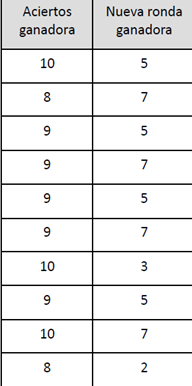

Lo que se observa en este caso es “La maldición del ganador”, la
performance que la jugadora que logró más aciertos en la
competencia general luego NO LA PUEDE MANTENER, en todos
los casos vemos que en la nueva ronda de diez tiene menos
aciertos que en la primera ronda de diez.

La primera ronda la jugadora que resultó ganadora fue debido a
la suerte, y esa suerte ya no la acompaña para la segunda ronda
de 10 tiros libres.

Relacionado con las competencias Kaggle, una forma de pensar
esto es "¿Cómo le va a ir al mejor modelo del Public Leaderboard
en el Private?" , esta es la razón por la que los puntajes que
vemos en el Private son inferiores al Public.

La primera ronda puede verse como quedarnos con el mejor
modelo del Public Leaderboard, la nueva ronda es como le va a
ese modelo en el Private Leaderboard.

Elegir el mejor modelo del Public, suele ser una pésima estrategia.

## 4) Cuarto Caso, el overfitting en su plenitud

¿Cuándo es más extremo el efecto de “La maldición del ganador” ?

Supongamos por un momento que ahora, en otro pueblo, tenemos 100 jugadoras nuevas, todas
con un “índice de enceste” de 0.70 ; recordar que ese valor jamás es conocido por la cazatalentos.
Ahora nos ponemos más estrictos, y las hacemos tirar 100 veces a cada una, elegimos a la
ganadora, y solo a esa ganadora la hacemos tirar 100 nuevos tiros libres.

Podemos pensarlo como que la cazatalentos se lleva a la mejor jugadora a la gran ciudad, le habla maravillas de ella a la
entrenadora, y la entrenadora dice “probemos a ver si es tan buena como decís, que haga 100 tiros
libres aquí y ahora”

In [10]:
# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino las jugadoras
jugadoras = [0.7] * 100


#vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

for i in range(10):
  vaciertos = vec_ftirar(jugadoras, 100) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  aciertos_torneo = vaciertos[mejor_ronda]
  aciertos_segunda = vec_ftirar(jugadoras[mejor_ronda], 100)
  print(aciertos_torneo, "\t", aciertos_segunda)

81 	 69
82 	 70
85 	 58
80 	 70
82 	 68
82 	 66
80 	 68
81 	 75
81 	 73
81 	 75


(imagen ilustrativa)
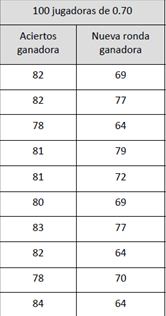

Nuevamente vemos, que el puntaje alcanzado por la mejor jugadora cuando compitió contra las
otras 99, NO ES VUELTO A ALCANZAR en la nueva ronda de 100 tiros libres que hace esa jugadora.

Este efecto es exactamente el mismo que vemos cuando alguien se empecina en lograr en el
Leaderboard Público el mayor puntaje de la clase, le va muy bien en el Público, pero se derrumba
catastróficamente en el Privado. Decimos que “overfiteó / sobreajustó el Leaderboard Publico”.

## 5) Quinto Caso, medida de la diferencia: "El problema de las múltiples comparaciones”

Ahora nos preguntamos, en este caso, en promedio ¿Cuánto más aciertos tiene la ganadora (debido
a la suerte) en la primera ronda con respecto a la segunda?

Corriendo el siguiente código vemos que la diferencia promedio es de aproximadamente 11.0

In [11]:
# calcula cuantos encestes logra una jugadora con indice de enceste prob
# que hace qyt tiros libres

def ftirar(prob, qty):
  return sum(np.random.rand(qty) < prob)



# defino las jugadoras
jugadoras = [0.7] * 100


# vectorizo la funcion  ftirar
vec_ftirar = np.vectorize(ftirar)

suma_diferencias = 0

for i in range(10000):
  vaciertos = vec_ftirar(jugadoras, 100) # 10 tiros libres cada jugadora
  mejor_ronda = np.argmax(vaciertos)
  aciertos_torneo = vaciertos[mejor_ronda]
  aciertos_segunda = vec_ftirar(jugadoras[mejor_ronda], 100)
  suma_diferencias += (aciertos_torneo - aciertos_segunda)




print(suma_diferencias/10000)

11.0179


Exactamente este mismo efecto se da en el marketing digital. Si en un A/B testing se prueban cien
alternativas y se elige a la que tiene más efectividad, se observará que en un nuevo experimento
disminuirá el rendimiento de esa alternativa.

También sucede si se prueban muchos medicamentos al mismo tiempo, el que resulte más
efectivo disminuirá su efectividad en la nueva prueba.

Este problema es llamado “El problema de las múltiples comparaciones”